In [22]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from collections import defaultdict
from IPython.display import Audio, display
from scipy.io import wavfile
from scipy.cluster.vq import kmeans2
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from notebooks.tf.scheduler import SGDRScheduler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [7]:
source_files = [f"./data/highfreq/{i}.wav" for i in range(1, 2)]

audio_files_data = np.array([], np.float32)
audio_files_indexes = []

sample_rate = 32000
sample_start = sample_rate * 60
sample_end = sample_rate * 70

for source in source_files:
    audio_files_indexes.append(len(audio_files_data))
    rate, data = wavfile.read(source)
    assert rate == sample_rate
    audio_files_data = np.concatenate((audio_files_data, data))

print("Samples:", len(audio_files_data))
print("Sample rate:", sample_rate)

Samples: 5568749
Sample rate: 32000


In [9]:
display(Audio(audio_files_data[sample_start:sample_end], rate=sample_rate))

In [20]:
SAMPLE_SIZE = 320
BATCH_COUNT = len(audio_files_data) // SAMPLE_SIZE

batched = audio_files_data[:SAMPLE_SIZE * BATCH_COUNT].reshape((
    BATCH_COUNT, SAMPLE_SIZE,
))[:5000]
print(batched.shape)

(5000, 320)


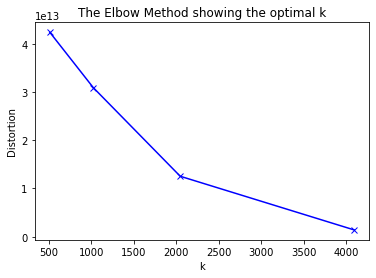

In [25]:
cluster_amounts = (512, 1024, 2048, 4096)

distortions = []
for k in cluster_amounts:
    kmeanModel = MiniBatchKMeans(n_clusters=k, max_iter=10, init_size=k * 3)
    kmeanModel.fit(batched)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(cluster_amounts, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()